# 2013 - Word2Vec

abstract: Here is our Jupyter notebook for the 2013 Word2Vec model, we will follow a similar structured approach. We include an introduction to Word2Vec, explain the core concepts (CBOW and Skip-Gram), and provide code using the `gensim` library to demonstrate how to train Word2Vec on a sample corpus.

[2013 Word2Vec](https://arxiv.org/abs/1301.3781)  
Word embeddings are high-dimensional vectors encapsulating semantic associations, as described by Word2Vec. This was a substantial advancement in capturing textual semantics.

In this notebook, we will explore Word2Vec, a neural network-based model that learns high-dimensional vector representations of words (word embeddings) from a large corpus of text. These embeddings capture semantic relationships between words, allowing words with similar meanings to have similar vector representations.

### Step-by-Step Explanation:

1. **Understanding Word2Vec**: Word2Vec uses two main architectures, Continuous Bag of Words (CBOW) and Skip-Gram, to learn word embeddings. 
   - **CBOW** predicts the target word based on its context.
   - **Skip-Gram** predicts the context words based on the target word.
2. **Training Word2Vec**: We train the Word2Vec model using a sample corpus to learn word embeddings.
3. **Exploring Word Embeddings**: We will explore how to use the trained model to find similar words, perform word arithmetic, and visualize the embeddings.

### How It Works:
- The Word2Vec model in the `gensim` library provides an efficient implementation to learn word embeddings using either the CBOW or Skip-Gram model.
- The model captures semantic relationships between words based on their co-occurrence in a given window size in the text.

### Implementation

#### 1. Install `gensim` (if not already installed)

Before running the code, ensure you have the `gensim` library installed. You can install it using:

```bash
!pip install gensim
```

In [2]:
# pip install gensim

#### 2. Import Libraries and Initialize the Corpus

In [3]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Sample documents
documents = [
    "The quick brown fox jumps over the lazy dog.",
    "Never jump over the lazy dog quickly.",
    "The quick brown fox is quick and fast."
]

# Tokenize the documents into words
tokenized_documents = [word_tokenize(doc.lower()) for doc in documents]

# Display tokenized documents
tokenized_documents

[['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.'],
 ['never', 'jump', 'over', 'the', 'lazy', 'dog', 'quickly', '.'],
 ['the', 'quick', 'brown', 'fox', 'is', 'quick', 'and', 'fast', '.']]

#### 3. Train the Word2Vec Model

In [4]:
# Initialize and train the Word2Vec model
# Using the Skip-Gram model by setting sg=1
word2vec_model = Word2Vec(sentences=tokenized_documents, vector_size=100, window=3, sg=1, min_count=1, epochs=100)

# Display the vocabulary
vocab = list(word2vec_model.wv.index_to_key)
print("Vocabulary:\n", vocab)


Vocabulary:
 ['the', 'quick', '.', 'lazy', 'dog', 'over', 'brown', 'fox', 'jump', 'never', 'is', 'fast', 'and', 'quickly', 'jumps']


#### 4. Explore the Word Embeddings

In [5]:
# Get the vector for a specific word
word_vector = word2vec_model.wv['quick']
print("\nVector for 'quick':\n", word_vector)

# Find the top 3 most similar words to 'quick'
similar_words = word2vec_model.wv.most_similar('quick', topn=3)
print("\nTop 3 words similar to 'quick':\n", similar_words)


Vector for 'quick':
 [-8.7621128e-03  3.8908108e-03  5.5894717e-03  5.7808403e-03
  7.5336108e-03 -6.3834656e-03  1.4439984e-03  6.6834823e-03
 -3.2562525e-03 -6.8524317e-03 -2.6144154e-04 -8.8059939e-03
 -5.7926904e-03  6.9426936e-03  3.4165697e-03  7.1209567e-03
  7.3234737e-03  7.6994216e-03 -4.2071738e-03 -1.3784240e-03
  2.2323127e-03 -4.5576920e-03  9.1809444e-03 -1.0133126e-02
  6.5365499e-03  3.1365447e-03 -5.1244567e-03  4.7948915e-03
 -2.0395664e-03  7.2554201e-03  1.0082860e-02 -4.6565877e-03
 -6.0574262e-04 -6.2608402e-03  3.6736436e-03  2.8662907e-03
  7.1448293e-03  6.1845412e-03  9.4512403e-03  9.4600162e-03
  8.3552049e-03 -7.1904450e-03 -9.6462248e-03 -1.4001103e-04
 -2.9036994e-03  7.8155315e-03  5.9187748e-03 -1.6038057e-03
  1.5622661e-03  2.0128048e-03  7.9391329e-03 -9.9763954e-03
 -5.5732598e-05  3.1866531e-03 -1.4364254e-03  8.3431937e-03
  9.0993978e-03  6.5037110e-03 -7.6394901e-04  7.9065189e-03
 -8.6081987e-03  2.9461284e-03 -4.1526128e-03 -5.1178080e-03
  

#### 5. Visualizing Word Embeddings (Optional)

To visualize word embeddings, we can reduce the dimensionality of the word vectors using techniques like PCA or t-SNE.

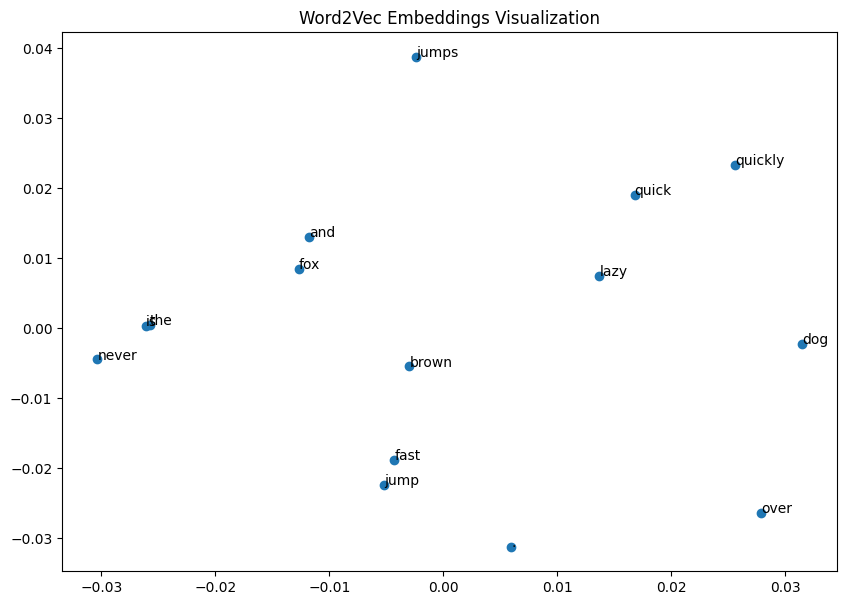

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Extract word vectors and reduce their dimensionality using PCA
word_vectors = word2vec_model.wv[vocab]
pca = PCA(n_components=2)
word_vecs_2d = pca.fit_transform(word_vectors)

# Plot the words in 2D space
plt.figure(figsize=(10, 7))
plt.scatter(word_vecs_2d[:, 0], word_vecs_2d[:, 1])

for i, word in enumerate(vocab):
    plt.annotate(word, (word_vecs_2d[i, 0], word_vecs_2d[i, 1]))

plt.title('Word2Vec Embeddings Visualization')
plt.show()




## 2013 - Word2Vec

Word embeddings are high-dimensional vectors encapsulating semantic associations, as described by Word2Vec. This was a substantial advancement in capturing textual semantics.

### Word2Vec (2013)

Word2Vec is a neural network-based model that learns word embeddings from a large corpus of text. These embeddings are high-dimensional vectors that represent the semantic meaning of words, allowing words with similar meanings to have similar vector representations. Word2Vec introduced two main architectures for generating word embeddings: Continuous Bag of Words (CBOW) and Skip-Gram.

#### 1. Continuous Bag of Words (CBOW)

In the CBOW model, the objective is to predict a target word given its context words within a window of a fixed size. 

Given a sequence of words $ w_1, w_2, \ldots, w_T $, the context window size $ c $, and a target word $ w_t $, the CBOW model aims to maximize the probability of the target word given the context words:

$$
\text{maximize} \quad P(w_t \mid w_{t-c}, \ldots, w_{t-1}, w_{t+1}, \ldots, w_{t+c})
$$

The probability of the target word $ w_t $ given the context is computed using the softmax function:

$$
P(w_t \mid \text{context}) = \frac{\exp(\mathbf{v}_{w_t}^\top \mathbf{h})}{\sum_{w=1}^{|V|} \exp(\mathbf{v}_{w}^\top \mathbf{h})}
$$

Where:
- $ \mathbf{v}_{w_t} $ is the vector representation (embedding) of the target word $ w_t $.
- $ \mathbf{h} $ is the average of the context word vectors.
- $ |V| $ is the size of the vocabulary.

#### 2. Skip-Gram

The Skip-Gram model works in the opposite direction of CBOW. Given a target word $ w_t $, it aims to predict the context words within a certain window size $ c $:

$$
\text{maximize} \quad \prod_{-c \leq j \leq c, j \neq 0} P(w_{t+j} \mid w_t)
$$

The probability of each context word $ w_{t+j} $ given the target word $ w_t $ is also computed using the softmax function:

$$
P(w_{t+j} \mid w_t) = \frac{\exp(\mathbf{v}_{w_{t+j}}^\top \mathbf{v}_{w_t})}{\sum_{w=1}^{|V|} \exp(\mathbf{v}_{w}^\top \mathbf{v}_{w_t})}
$$

Where:
- $ \mathbf{v}_{w_{t+j}} $ is the vector representation of the context word $ w_{t+j} $.
- $ \mathbf{v}_{w_t} $ is the vector representation of the target word $ w_t $.
- $ |V| $ is the size of the vocabulary.

#### 3. Training Objective

The training objective for both CBOW and Skip-Gram is to maximize the log likelihood of the observed word-context pairs in the corpus. This is typically done using optimization techniques like Stochastic Gradient Descent (SGD).

#### 4. Word Embeddings

Once trained, the model produces word embeddings—high-dimensional vectors $ \mathbf{v}_w $ for each word $ w $ in the vocabulary. These vectors encapsulate semantic relationships, allowing words with similar meanings to have similar embeddings. This enables various natural language processing tasks such as word analogy solving, clustering, and classification.

### Example

Consider a small corpus with the following sentences:
1. "The quick brown fox jumps over the lazy dog."
2. "Never jump over the lazy dog quickly."
3. "The quick brown fox is quick and fast."

Using Word2Vec with a small window size, the model learns embeddings for each word based on its surrounding words. For example, the word "quick" might have a vector representation $ \mathbf{v}_{\text{quick}} $ that is close to $ \mathbf{v}_{\text{fast}} $ in the vector space due to their similar contexts.

### Mathematical Notation

- **CBOW Objective:** $ P(w_t \mid w_{t-c}, \ldots, w_{t-1}, w_{t+1}, \ldots, w_{t+c}) $
- **Skip-Gram Objective:** $ \prod_{-c \leq j \leq c, j \neq 0} P(w_{t+j} \mid w_t) $
- **Softmax Probability (CBOW):**
  $$
  P(w_t \mid \text{context}) = \frac{\exp(\mathbf{v}_{w_t}^\top \mathbf{h})}{\sum_{w=1}^{|V|} \exp(\mathbf{v}_{w}^\top \mathbf{h})}
  $$
- **Softmax Probability (Skip-Gram):**
  $$
  P(w_{t+j} \mid w_t) = \frac{\exp(\mathbf{v}_{w_{t+j}}^\top \mathbf{v}_{w_t})}{\sum_{w=1}^{|V|} \exp(\mathbf{v}_{w}^\top \mathbf{v}_{w_t})}
  $$

### Summary
Word2Vec represents a significant advancement in NLP by learning continuous word embeddings that capture semantic relationships. By training a neural network model on a large text corpus, it provides a powerful way to represent words in a vector space, enabling various downstream tasks in natural language processing.
